## Это простенький проект-исследование, который фокусируется на механике работы компостера в Minecraft.

После улучшения компостера до определенного уровня он позволяет получать костную муку (удобрение в мире игры) с помощью органики: плодов, листьев, семян и т.д. Количество органики, которое необходимо внести, чтобы получить костную муку, зависит от вида предмета, однако непостоянно в любом случае. 

Мы используем датасет 
[https://www.kaggle.com/datasets/brandonconrady/minecraft-composting-dataset/data]
чтобы проверить, существует ли некоторая взаимосвязь между плодами определенных видов и соответствующими им семенами в способности давать костную муку. 

Условно назовем это "компостным потенциалом".

In [24]:
import numpy as np
import matplotlib.pyplot as plt

Для начала выделим из датасета те виды еды, для которых в игре существуют семена.

Это:

    яблоки и саженцы дуба в качестве семян (игровая условность)
    арбузы и их семена
    тыквы и их семена
    свекла и ее семена
    пшеница и ее семена
    
Итого 5 пар предметов.

Построим гистограммы для каждой пары предметов, чтобы рассмотреть их распределения.

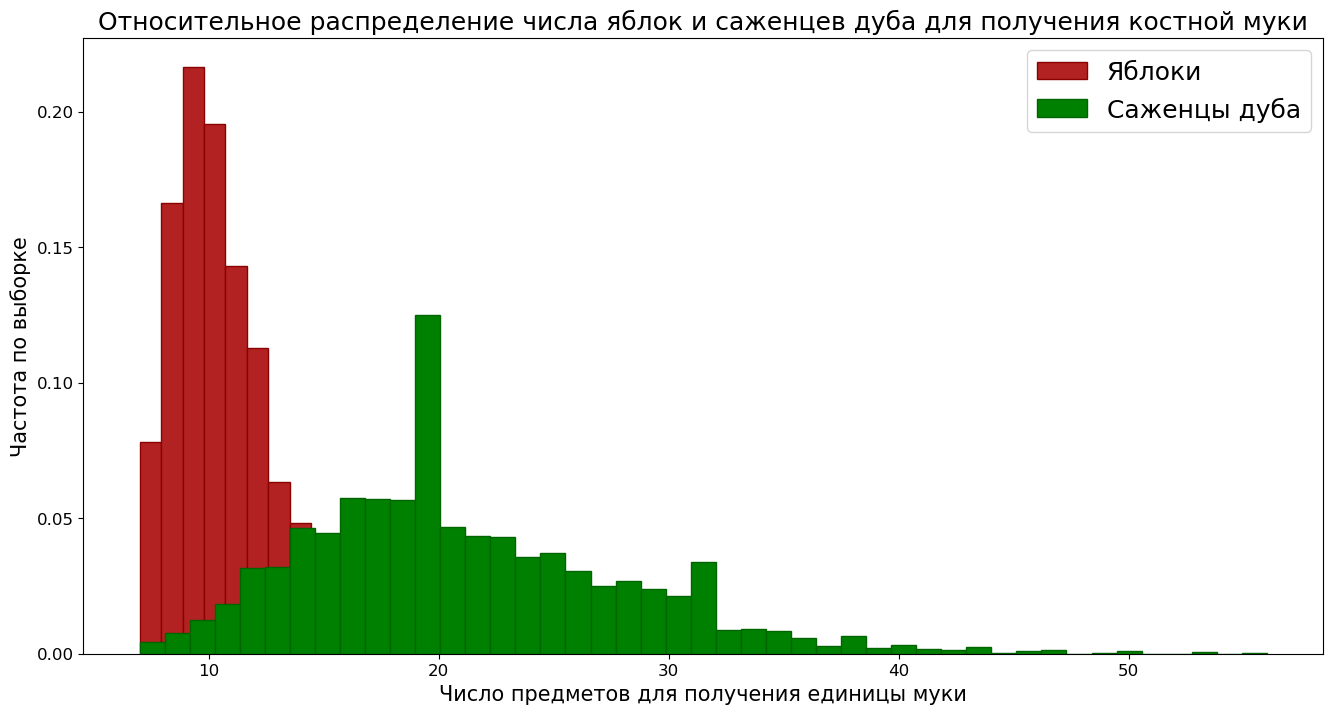

In [25]:
apples = np.loadtxt('data/composter/Apple_v2.csv', unpack=True, skiprows = 1)
oakseeds = np.loadtxt('data/composter/Oaksapling_v2.csv', unpack=True, skiprows = 1)
plt.figure(figsize = (16, 8))
plt.hist(apples, bins=15, density = True, color = 'firebrick', ec = 'darkred')
plt.hist(oakseeds, bins=45, density = True, color = 'green', ec = 'darkgreen')
plt.title('Относительное распределение числа яблок и саженцев дуба для получения костной муки', fontsize=18)
plt.ylabel('Частота по выборке', fontsize=15)     
plt.xlabel('Число предметов для получения единицы муки',fontsize=15) 
plt.legend(['Яблоки', 'Саженцы дуба'], fontsize=18) 
plt.gca().tick_params(labelsize=12) 

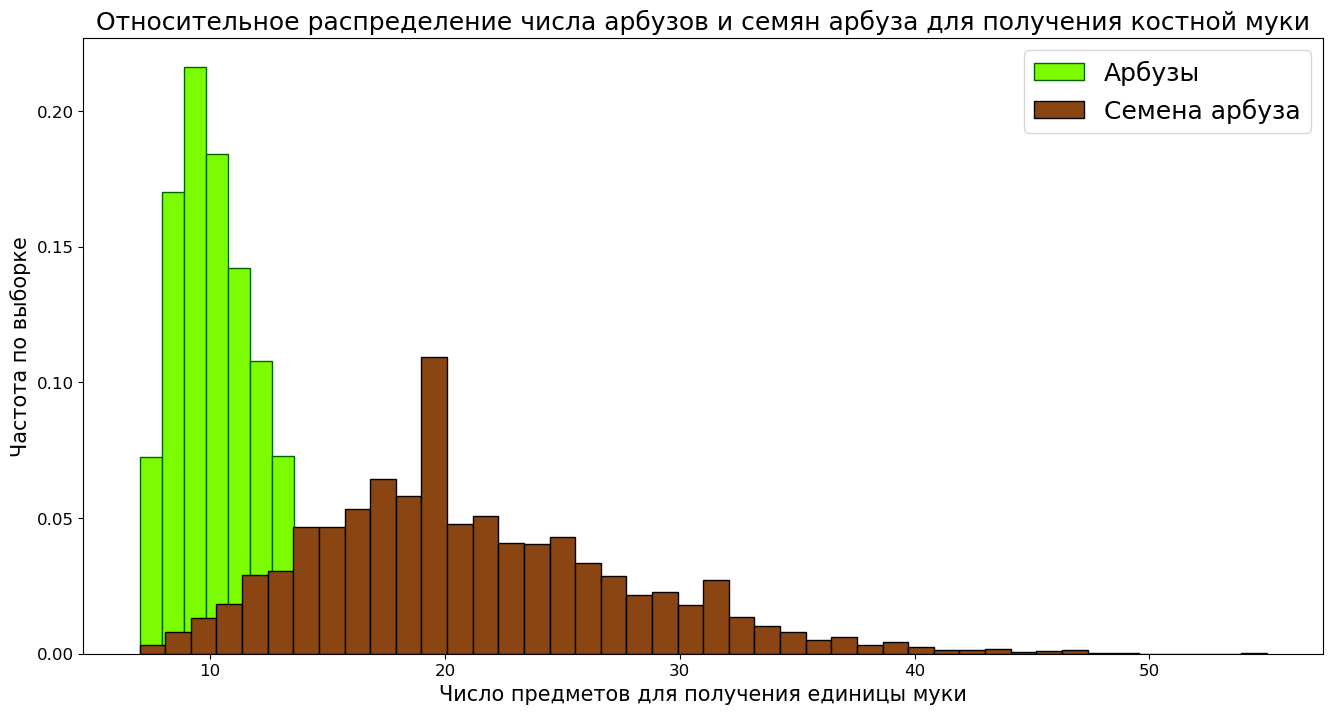

In [7]:
melons = np.loadtxt('data/composter/Melon_v2.csv', unpack=True, skiprows = 1)
melonseeds = np.loadtxt('data/composter/Melonseed_v2.csv', unpack=True, skiprows = 1)
plt.figure(figsize = (16, 8))
plt.hist(melons, bins=16, density = True, color = 'lawngreen', ec = 'darkgreen')
plt.hist(melonseeds, bins=44, density = True, color = 'saddlebrown', ec = 'black')
plt.title('Относительное распределение числа арбузов и семян арбуза для получения костной муки', fontsize=18)
plt.ylabel('Частота по выборке', fontsize=15)     
plt.xlabel('Число предметов для получения единицы муки',fontsize=15) 
plt.legend(['Арбузы', 'Семена арбуза'], fontsize=18) 
plt.gca().tick_params(labelsize=12) 

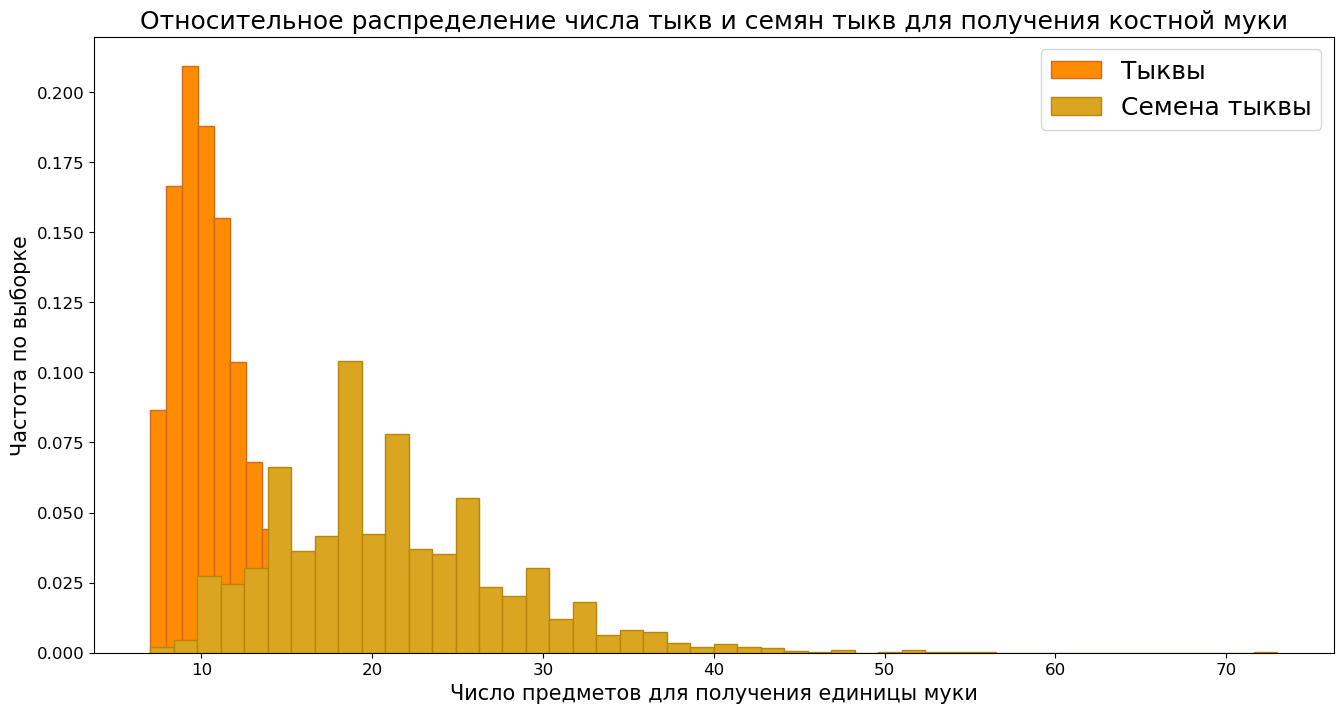

In [29]:
pumpkins = np.loadtxt('data/composter/Pumpkin_v2.csv', unpack=True, skiprows = 1)
pumpkinseeds = np.loadtxt('data/composter/Pumpkinseed_v2.csv', unpack=True, skiprows = 1)
plt.figure(figsize = (16, 8))
plt.hist(pumpkins, bins=15, density = True, color = 'darkorange', ec = 'chocolate')
plt.hist(pumpkinseeds, bins=48, density = True, color = 'goldenrod', ec = 'darkgoldenrod')
plt.title('Относительное распределение числа тыкв и семян тыкв для получения костной муки', fontsize=18)
plt.ylabel('Частота по выборке', fontsize=15)     
plt.xlabel('Число предметов для получения единицы муки',fontsize=15) 
plt.legend(['Тыквы', 'Семена тыквы'], fontsize=18) 
plt.gca().tick_params(labelsize=12) 

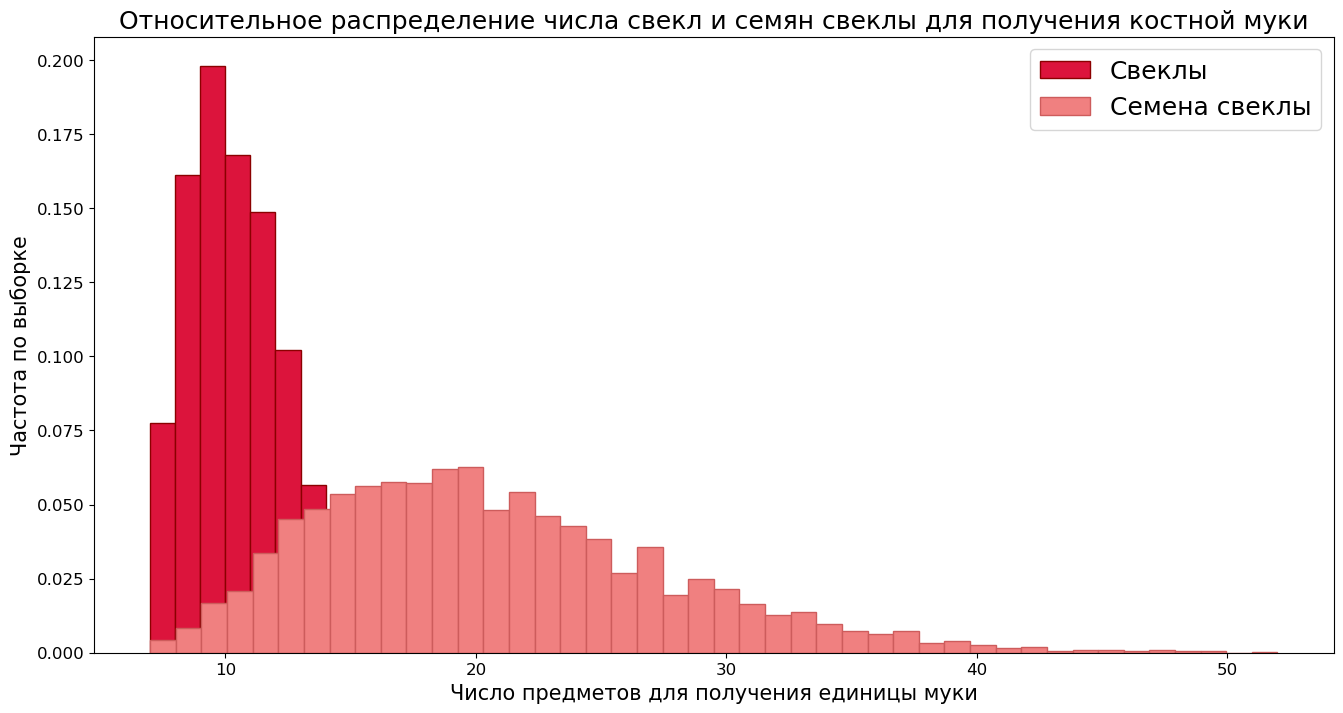

In [18]:
radish = np.loadtxt('data/composter/Radish_v2.csv', unpack=True, skiprows = 1)
radishseeds = np.loadtxt('data/composter/Radishseed_v2.csv', unpack=True, skiprows = 1)
plt.figure(figsize = (16, 8))
plt.hist(radish, bins=16, density = True, color = 'crimson', ec = 'darkred')
plt.hist(radishseeds, bins=44, density = True, color = 'lightcoral', ec = 'indianred')
plt.title('Относительное распределение числа свекл и семян свеклы для получения костной муки', fontsize=18)
plt.ylabel('Частота по выборке', fontsize=15)     
plt.xlabel('Число предметов для получения единицы муки',fontsize=15) 
plt.legend(['Свеклы', 'Семена свеклы'], fontsize=18) 
plt.gca().tick_params(labelsize=12) 

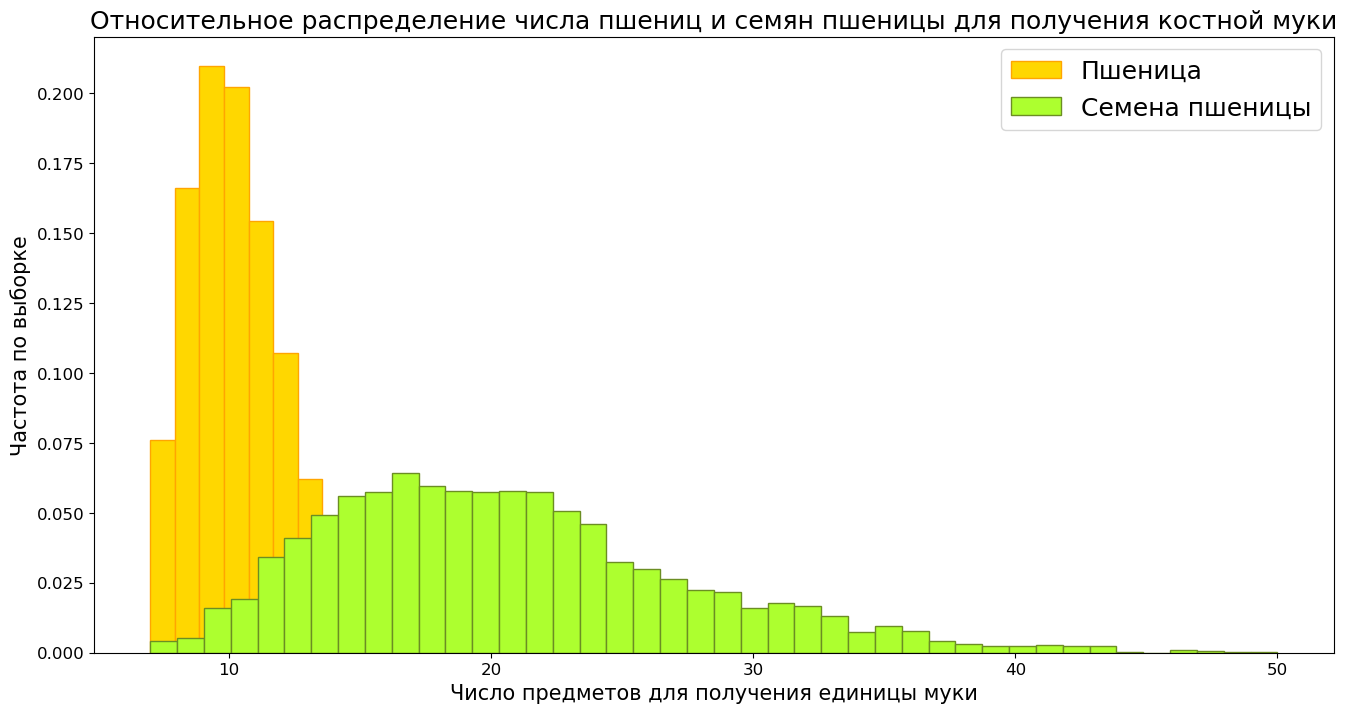

In [27]:
wheat = np.loadtxt('data/composter/Wheat_v2.csv', unpack=True, skiprows = 1)
wheatseeds = np.loadtxt('data/composter/Wheatseed_v2.csv', unpack=True, skiprows = 1)
plt.figure(figsize = (16, 8))
plt.hist(wheat, bins=16, density = True, color = 'gold', ec = 'orange')
plt.hist(wheatseeds, bins=42, density = True, color = 'greenyellow', ec = 'olivedrab')
plt.title('Относительное распределение числа пшениц и семян пшеницы для получения костной муки', fontsize=18)
plt.ylabel('Частота по выборке', fontsize=15)     
plt.xlabel('Число предметов для получения единицы муки',fontsize=15) 
plt.legend(['Пшеница', 'Семена пшеницы'], fontsize=18) 
plt.gca().tick_params(labelsize=12) 

По гистограммам выше мы можем явно наблюдать схожесть распределений количества плодов, необходимых для появления костной муки, между собой. Аналогично графики показывают схожесть распределений количества семян, необходимых для появления костной муки, между собой.


## Эта закономерность навела нас на гипотезу: одинаково ли отношение компостных потенциалов любого плода и его семян?
То есть - действительно ли для любой пары плод-семя для получения одинакового количества костной муки нужно потратить в N раз больше семян, чем плодов?

Мы решили проверить это предположение с помощью методов математической статистики.

In [31]:
app_m = np.mean(apples) # считаем средние значения по выборке для яблок (плодов)
oak_m = np.mean(oakseeds) # считаем средние значения по выборке для саженцев дуба (семян)

mel_m = np.mean(melons)
mes_m = np.mean(melonseeds)

pum_m = np.mean(pumpkins)
pus_m = np.mean(pumpkinseeds)

rad_m = np.mean(radish)
ras_m = np.mean(radishseeds)

whe_m = np.mean(wheat)
whs_m = np.mean(wheatseeds)

plods = [apples, melons, pumpkins, radish, wheat] # создаем список из всех выборок плодов
plodsmean = [app_m, mel_m, pum_m, rad_m, whe_m] # создаем список из всех средних значений выборок плодов

seeds = [oakseeds, melonseeds, pumpkinseeds, radishseeds, wheatseeds] # создаем список из всех выборок семян
seedsmean = [oak_m, mes_m, pus_m, ras_m, whs_m] # создаем список из всех средних значений выборок семян

plodstd = [] # готовимся считать дисперсии для выборок плодов
seedsstd = [] # готовимся считать дисперсии для выборок плодов

std2 = 0
for j in range(len(plods)): # рассчитываем дисперсию для выборки плодов с помощью полученных ранее значений средних по выборкам
    for i in plods[j]:
        std2 += (i - plodsmean[j])**2
    std2 = std2 / (len(plods[j]) - 1)
    plodstd.append(std2)
    std2 = 0

for j in range(len(seeds)): # рассчитываем дисперсию для выборки семян с помощью полученных ранее значений средних по выборкам
    for i in seeds[j]:
        std2 += (i - seedsmean[j])**2
    std2 = std2 / (len(seeds[j]) - 1)
    seedsstd.append(std2)
    std2 = 0

После рассчета необходимых значений (средние значения по выборкам, дисперсии для выборок) формулируем гипотезы исследования:

`Hо: отношение матожидания плодов и семян - постоянное значение`

`Ha: отношение матожидания плодов и семян - непостоянное значение`

Далее необходимо упростить задачу так, чтобы остатков знаний с курса матстатистики хватило для ее решения:

    На самом деле отношение матожиданий для каждой пары плод-семя будет постоянно, если мю всех плодов равны между собой, и мю всех семян равны между собой.

Мы также предполагаем нормальное распределение для каждой отдельно взятой выборки.

Кроме этого, мы совсем обнаглеем и упростим (урежем) задачу, и будем считать, что гипотеза верна, если она верна хотя бы для пар типов объектов: арбуза (и его семян) и тыквы (и ее семян)


Таким образом, наша задача упрощается до проверки двух гипотез:

1)

`Hо: матожидания плодов арбуза и плодов тыквы равны`

`Ha: матожидания плодов арбуза и плодов тыквы не равны`

2)

`Hо: матожидания семян арбуза и семян тыквы равны`

`Ha: матожидания семян арбуза и семян тыквы не равны`

Чтобы искупить свою вину, задаем уровень значимости в 10%.

In [32]:
s = np.random.standard_normal(1000000) # Симулируем нормальное распределение

T_plod = (mel_m - pum_m) / ((plodstd[1]/len(plods[1]) + (plodstd[2]/len(plods[2]))))**(1/2) # Расчет статистического значения для плодов (проверка гипотез о равенстве матожиданий)
p1 = 1 - (np.sum(s<abs(T_plod)) / float(len(s))) # Считаем P-value

if p1 > 0.05: # учитываем, что гипотезы двусторонние
    print('Гипотеза принимается на уровне значимости 10%. Матожидания арбуза и тыквы равны')
else:
    print('Гипотеза не принимается на уровне значимости 10%. Матожидания арбуза и тыквы не равны')

T_seed = (mes_m - pus_m) / ((seedsstd[1]/len(seeds[1]) + (seedsstd[2]/len(seeds[2]))))**(1/2) # Расчет статистического значения для семян (проверка гипотез о равенстве матожиданий)
p2 = 1 - (np.sum(s<abs(T_seed)) / float(len(s))) # Считаем P-value

if p2 > 0.05: # учитываем, что гипотезы двусторонние
    print('Гипотеза принимается на уровне значимости 10%. Матожидания семян арбуза и тыквы равны')
else:
    print('Гипотеза не принимается на уровне значимости 10%. Матожидания семян арбуза и тыквы не равны')

print()
if p1 > 0.05 and p2 > 0.05:
    print('Отношение матожиданий постоянно, т.е. отношение компостных потенциалов семян и соответствующих им плодов постоянно для всех выделенных пар предметов и равно приблизительно', (round((sum(plodsmean)/sum(seedsmean)), 3)))
    print('В среднем на любой выбранный плод вам понадобится', (round((sum(seedsmean)/sum(plodsmean)), 3)), 'семян для получения того же количества костной муки')
else:
    print('Отношение матожиданий непостоянно')

Гипотеза принимается на уровне значимости 10%. Матожидания арбуза и тыквы равны
Гипотеза принимается на уровне значимости 10%. Матожидания семян арбуза и тыквы равны

Отношение матожиданий постоянно, т.е. отношение компостных потенциалов семян и соответствующих им плодов постоянно для всех выделенных пар предметов и равно приблизительно 0.488
В среднем на любой выбранный плод вам понадобится 2.047 семян для получения того же количества костной муки


Наконец, наглядно отобразим последнее вычисленное значение (коэффициент компостного потенциала) для каждой пары семя-плод.

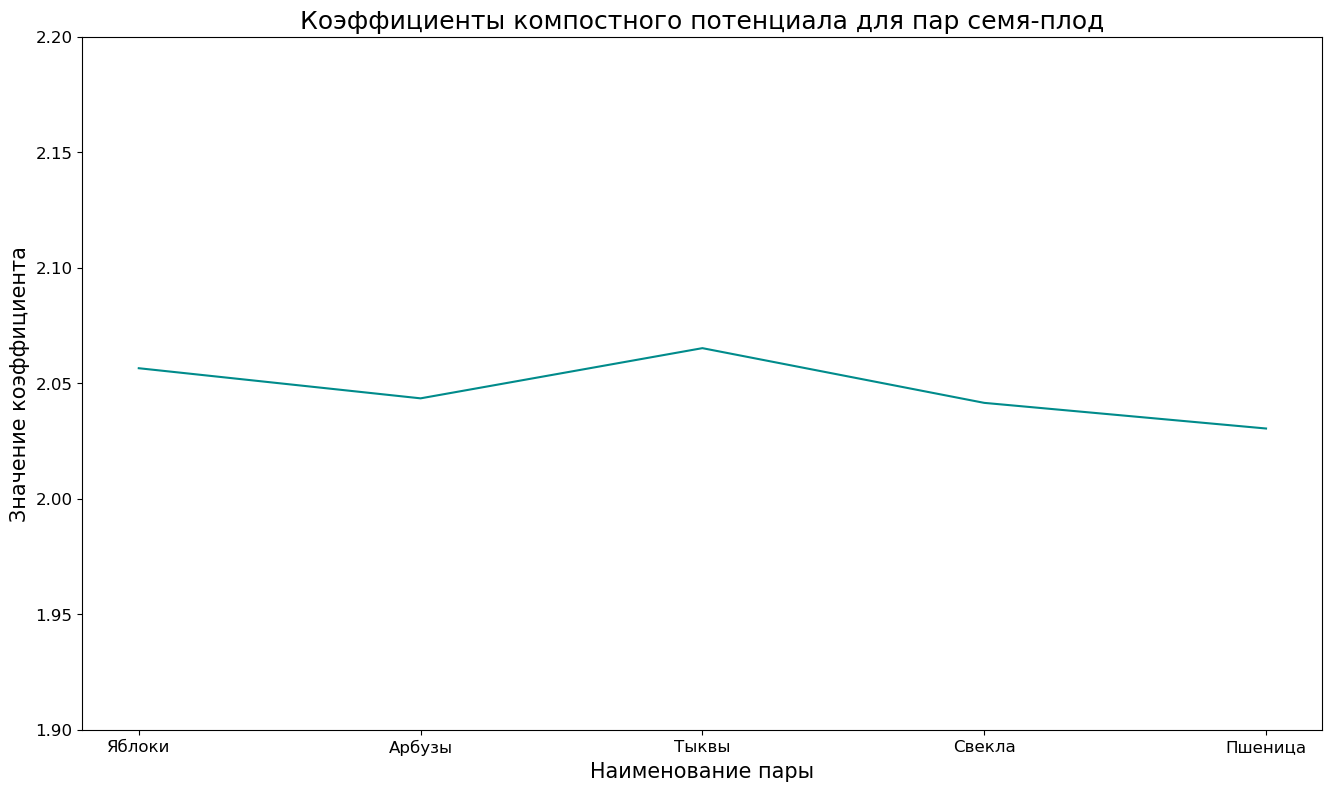

In [34]:
potensial = [oak_m/app_m, mes_m/mel_m, pus_m/pum_m, ras_m/rad_m, whs_m/whe_m]
name = ['Яблоки', 'Арбузы', 'Тыквы', 'Свекла', 'Пшеница']

plt.figure(figsize = (16, 9))
plt.plot(name, potensial, color = 'darkcyan')
plt.ylim([1.9, 2.2])
plt.title('Коэффициенты компостного потенциала для пар семя-плод', fontsize=18)
plt.ylabel('Значение коэффициента', fontsize=15)     
plt.xlabel('Наименование пары',fontsize=15)           
plt.gca().tick_params(labelsize=12) 

Исследование подошло к концу и показало, что в Minecraft отношение компостного потенциала плодов к их семян действительно постоянно, и приблизительно равно 2.05 согласно выборке. Можно утверждать, что для того чтобы получить то же количество муки, что и при использовании плодов, вам потребуется в 2.05 раз больше семян.

Полезно ли это? Не знаю, но применять методы матстатистики для этого датасета было весело.